# 🪐 Exoplanet Discovery — Light Curve Exploration

### Objective
In this notebook, we begin by exploring a **real light curve dataset** from the *Kepler Space Telescope*.  
The goal is to visualize stellar brightness variations over time and prepare the data for transit detection in the next steps.

### Steps
1. Search and download light curve data using **Lightkurve**.  
2. Visualize the raw light curve (flux vs. time).  
3. Save it as `sample.csv` in `data/raw/` for later use.

---

> **Tip:** The light curve shows how the star's brightness changes.  
> Small periodic dips may indicate an exoplanet transit.


In [5]:
import warnings
warnings.filterwarnings("ignore")


### Step 1 — Import Required Libraries

We start by importing the necessary Python packages.  
- `lightkurve` to access Kepler data  
- `matplotlib` and `pandas` for visualization and data handling  
- `pathlib` for directory management


In [6]:
import lightkurve as lk

# Example: get a TESS light curve for a known exoplanet host (e.g. Kepler-10)
search_result = lk.search_lightcurve("Kepler-10", mission="Kepler")
search_result


#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 02,2009,Kepler,60,kplr011904151,0.0
1,Kepler Quarter 03,2009,Kepler,60,kplr011904151,0.0
2,Kepler Quarter 03,2009,Kepler,60,kplr011904151,0.0
3,Kepler Quarter 03,2009,Kepler,60,kplr011904151,0.0
4,Kepler Quarter 00,2009,Kepler,1800,kplr011904151,0.0
5,Kepler Quarter 01,2009,Kepler,1800,kplr011904151,0.0
6,Kepler Quarter 02,2009,Kepler,1800,kplr011904151,0.0
7,Kepler Quarter 03,2009,Kepler,1800,kplr011904151,0.0
8,Kepler Quarter 07,2010,Kepler,60,kplr011904151,0.0


### Step 2 — Search for Target Light Curve

We use the `search_lightcurve` function from `lightkurve` to find all available observations for a specific star.  
Here we use the Kepler target `KIC 11904151` as an example.


In [7]:
search_result.table[:5]


intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID,objID1,distance,exptime,obsID,obs_collection_products,dataproduct_type_products,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project_products,prvversion,proposal_id_products,productFilename,size,parent_obsid,dataRights_products,calib_level_products,filters_products,author,mission,#,year,sort_order
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,s,,,,,,,,,,,,,,,,,,,,,,,,
str7,str6,str10,str17,str6,str6,str7,str28,str1,str68,float64,float64,str10,str23,int64,float64,float64,float64,float64,float64,str18,float64,str3,str6,int64,str112,str115,str121,str6,bool,float64,str9,str9,str9,float64,float64,str9,str6,str10,str60,str1,str125,str9,str28,str8,str1,str10,str4,str3,str77,int64,str9,str6,int64,str6,str10,object,int64,int64,int64
science,Kepler,Kepler,Kepler,Kepler,KEPLER,OPTICAL,kplr011904151,--,kplr011904151_sc_Q001313330333033302,285.679391,50.2413,timeseries,William Borucki,2,54953.0375,56423.510416666664,60.0,418.4,905.0,Kepler Key Project,nan,EX,Kepler,--,POLYGON ICRS 285.67591655 50.24352200 285.67591688 50.23907800 285.68286512 50.23907800 285.68286545 50.24352200,http://archive.stsci.edu/missions/kepler/previews/0119/011904151/kplr011904151-2012310112549_slc_bw_large.png,http://archive.stsci.edu/missions/kepler/lightcurves/0119/011904151/kplr011904151_sc_Q001313330333033302.tar,PUBLIC,--,5885.0,601036,827914,827914,0.0,60,601036,Kepler,timeseries,Lightcurve Short Cadence (CSC) - Q2,C,mast:KEPLER/url/missions/kepler/lightcurves/0119/011904151/kplr011904151-2009231120729_slc.fits,SCIENCE,Minimum Recommended Products,SLC,--,Kepler,--,EX,kplr011904151-2009231120729_slc.fits,4432320,601036,PUBLIC,2,KEPLER,Kepler,Kepler Quarter 02,0,2009,1
science,Kepler,Kepler,Kepler,Kepler,KEPLER,OPTICAL,kplr011904151,--,kplr011904151_sc_Q001313330333033302,285.679391,50.2413,timeseries,William Borucki,2,54953.0375,56423.510416666664,60.0,418.4,905.0,Kepler Key Project,nan,EX,Kepler,--,POLYGON ICRS 285.67591655 50.24352200 285.67591688 50.23907800 285.68286512 50.23907800 285.68286545 50.24352200,http://archive.stsci.edu/missions/kepler/previews/0119/011904151/kplr011904151-2012310112549_slc_bw_large.png,http://archive.stsci.edu/missions/kepler/lightcurves/0119/011904151/kplr011904151_sc_Q001313330333033302.tar,PUBLIC,--,5885.0,601036,827914,827914,0.0,60,601036,Kepler,timeseries,Lightcurve Short Cadence (CSC) - Q3,C,mast:KEPLER/url/missions/kepler/lightcurves/0119/011904151/kplr011904151-2009291181958_slc.fits,SCIENCE,Minimum Recommended Products,SLC,--,Kepler,--,EX,kplr011904151-2009291181958_slc.fits,4484160,601036,PUBLIC,2,KEPLER,Kepler,Kepler Quarter 03,1,2009,1
science,Kepler,Kepler,Kepler,Kepler,KEPLER,OPTICAL,kplr011904151,--,kplr011904151_sc_Q001313330333033302,285.679391,50.2413,timeseries,William Borucki,2,54953.0375,56423.510416666664,60.0,418.4,905.0,Kepler Key Project,nan,EX,Kepler,--,POLYGON ICRS 285.67591655 50.24352200 285.67591688 50.23907800 285.68286512 50.23907800 285.68286545 50.24352200,http://archive.stsci.edu/missions/kepler/previews/0119/011904151/kplr011904151-2012310112549_slc_bw_large.png,http://archive.stsci.edu/missions/kepler/lightcurves/0119/011904151/kplr011904151_sc_Q001313330333033302.tar,PUBLIC,--,5885.0,601036,827914,827914,0.0,60,601036,Kepler,timeseries,Lightcurve Short Cadence (CSC) - Q3,C,mast:KEPLER/url/missions/kepler/lightcurves/0119/011904151/kplr011904151-2009322144938_slc.fits,SCIENCE,Minimum Recommended Products,SLC,--,Kepler,--,EX,kplr011904151-2009322144938_slc.fits,4440960,601036,PUBLIC,2,KEPLER,Kepler,Kepler Quarter 03,2,2009,1
science,Kepler,Kepler,Kepler,Kepler,KEPLER,OPTICAL,kplr0119041

### Step 3 — Download One Light Curve

The search result contains multiple quarters (observation campaigns).  
We'll download one light curve with **1800-second exposure** to start (for example, index 5).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

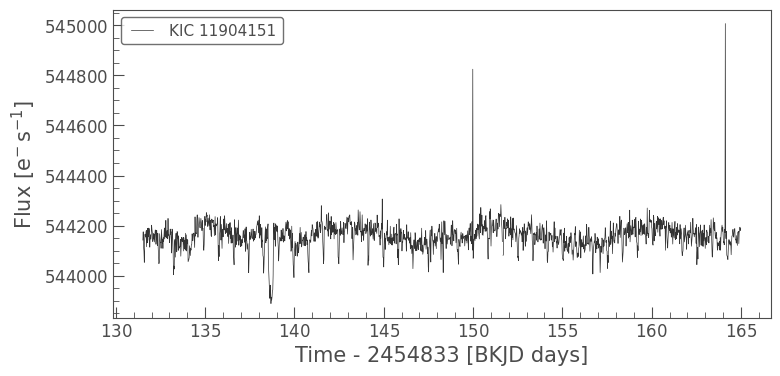

In [8]:
lc = search_result[5].download()
lc.plot()


### Step 4 — Convert and Save as CSV

After downloading the light curve, we convert it into a pandas DataFrame  
and save it in our project folder under `data/raw/`.  
This CSV file will be used later for periodogram analysis and model training.


In [13]:
from pathlib import Path
import pandas as pd

# Convert light curve to pandas DataFrame
df = lc.to_pandas()

Path(r"E:\Data science\projects\exoplanet-discovery\data\raw").mkdir(parents=True, exist_ok=True)

# Save CSV file to your specific path
save_path = r"E:\Data science\projects\exoplanet-discovery\data\raw\sample.csv"
df.to_csv(save_path, index=False)

print(f"✅ Saved {len(df)} rows to {save_path}")




✅ Saved 1626 rows to E:\Data science\projects\exoplanet-discovery\data\raw\sample.csv


✅ The dataset has been saved successfully at  
`E:\Data science\projects\exoplanet-discovery\data\raw\sample.csv`

It contains the columns:
- **time** → observation time in BKJD days  
- **flux** → measured stellar brightness  
- **flux_err** → flux uncertainty  



### Step 5 — Data Cleaning

Before analyzing the light curve, we should remove data points with poor quality.  
The `quality` column indicates whether a given measurement is reliable (0 = good).  
We’ll keep only rows where `quality == 0`.


In [14]:
# Remove bad-quality data
clean_df = df[df["quality"] == 0].copy()

print(f"✅ Original data: {len(df)} rows")
print(f"✅ Cleaned data: {len(clean_df)} rows remain after removing bad-quality points")


✅ Original data: 1626 rows
✅ Cleaned data: 1432 rows remain after removing bad-quality points


### Step 6 — Quick Statistical Overview

Let's view some basic statistics for the cleaned dataset.  
We’ll examine the average flux, standard deviation, and time range to understand the signal distribution.


In [15]:
# Display basic info and statistics
print(clean_df.describe())
print("\nColumns available:", clean_df.columns.tolist())


                flux     flux_err  quality     timecorr  centroid_col  \
count    1432.000000  1432.000000   1432.0  1432.000000   1432.000000   
mean   544156.437500    20.661179      0.0     0.001741    659.353292   
std        48.693012     0.031568      0.0     0.000238      0.003255   
min    543888.500000    20.500942      0.0     0.001321    659.347270   
25%    544132.234375    20.642807      0.0     0.001537    659.351216   
50%    544161.843750    20.665738      0.0     0.001743    659.352257   
75%    544187.781250    20.684166      0.0     0.001953    659.355347   
max    544283.812500    20.715611      0.0     0.002166    659.361154   

       centroid_row    cadenceno      sap_flux  sap_flux_err      sap_bkg  \
count   1432.000000  1432.000000    1432.00000   1432.000000  1432.000000   
mean     250.259207  1868.743715  526426.56250     19.879299  2196.960205   
std        0.027975   454.147229    1635.72998      0.026212    41.611530   
min      250.200250  1105.000000  

### Step 7 — Plot the Clean Light Curve

We will:
1) ensure a `time` column exists (fallback to `lc.time.value` if missing),
2) choose the best available flux column (`pdcsap_flux` → `flux` → `sap_flux`),
3) keep only good-quality points (`quality == 0`), and
4) plot the clean light curve.


Using flux column: pdcsap_flux
Rows after cleaning: 1432


<Figure size 1000x400 with 0 Axes>

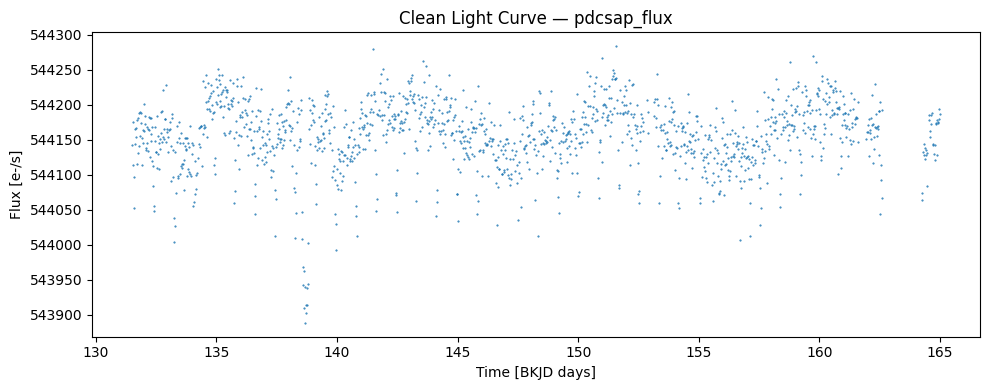

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Ensure we have a 'time' column
if "time" not in df.columns:
    try:
        df = df.copy()
        df["time"] = lc.time.value  # from the LightCurve object
    except Exception as e:
        raise RuntimeError(f"Cannot construct 'time' column: {e}")

# 2) Choose the best flux column
if "pdcsap_flux" in df.columns:
    flux_col = "pdcsap_flux"
elif "flux" in df.columns:
    flux_col = "flux"
elif "sap_flux" in df.columns:
    flux_col = "sap_flux"
else:
    raise RuntimeError("No suitable flux column found (pdcsap_flux/flux/sap_flux).")

# 3) Keep only good-quality points (if 'quality' exists)
clean_df = df.copy()
if "quality" in clean_df.columns:
    clean_df = clean_df[clean_df["quality"] == 0].copy()

# Drop NaNs in time/flux
clean_df = clean_df[["time", flux_col]].dropna()

print(f"Using flux column: {flux_col}")
print(f"Rows after cleaning: {len(clean_df)}")

# 4) Plot
plt.figure(figsize=(10, 4))
plt.plot(clean_df["time"], clean_df[flux_col], ".", markersize=1)
plt.title(f"Clean Light Curve — {flux_col}")
plt.xlabel("Time [BKJD days]")
plt.ylabel("Flux [e-/s]")
plt.tight_layout()
plt.show()


**Result:** We produced a clean time–flux plot using the best flux column and only good-quality data.
Small downward dips in the plot may indicate potential exoplanet transits.


### Step 7.1 — Save the cleaned light curve
We save the cleaned two-column light curve (`time`, `flux`) to use in the next notebook.


In [18]:
from pathlib import Path
out_path = Path(r"E:\Data science\projects\exoplanet-discovery\data\processed\clean_lightcurve.csv")
out_path.parent.mkdir(parents=True, exist_ok=True)

clean_df.rename(columns={flux_col: "flux"})[["time", "flux"]].to_csv(out_path, index=False)
print("Saved:", out_path)


Saved: E:\Data science\projects\exoplanet-discovery\data\processed\clean_lightcurve.csv


### Step 7.2 — Normalize flux (optional)
Dividing by the median helps to see small transit dips more clearly.


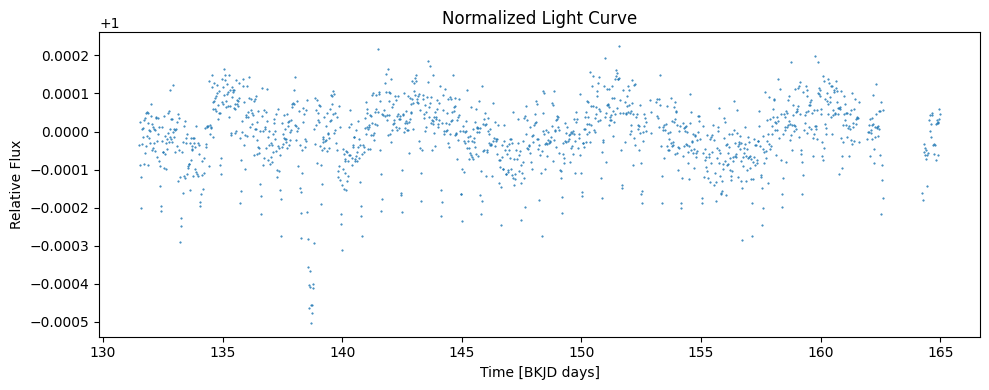

In [19]:
norm = clean_df[flux_col] / np.median(clean_df[flux_col])
plt.figure(figsize=(10, 4))
plt.plot(clean_df["time"], norm, ".", markersize=1)
plt.title("Normalized Light Curve")
plt.xlabel("Time [BKJD days]")
plt.ylabel("Relative Flux")
plt.tight_layout()
plt.show()
